<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
# DESCRIPTIVE ANALYTICS
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [7]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [8]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


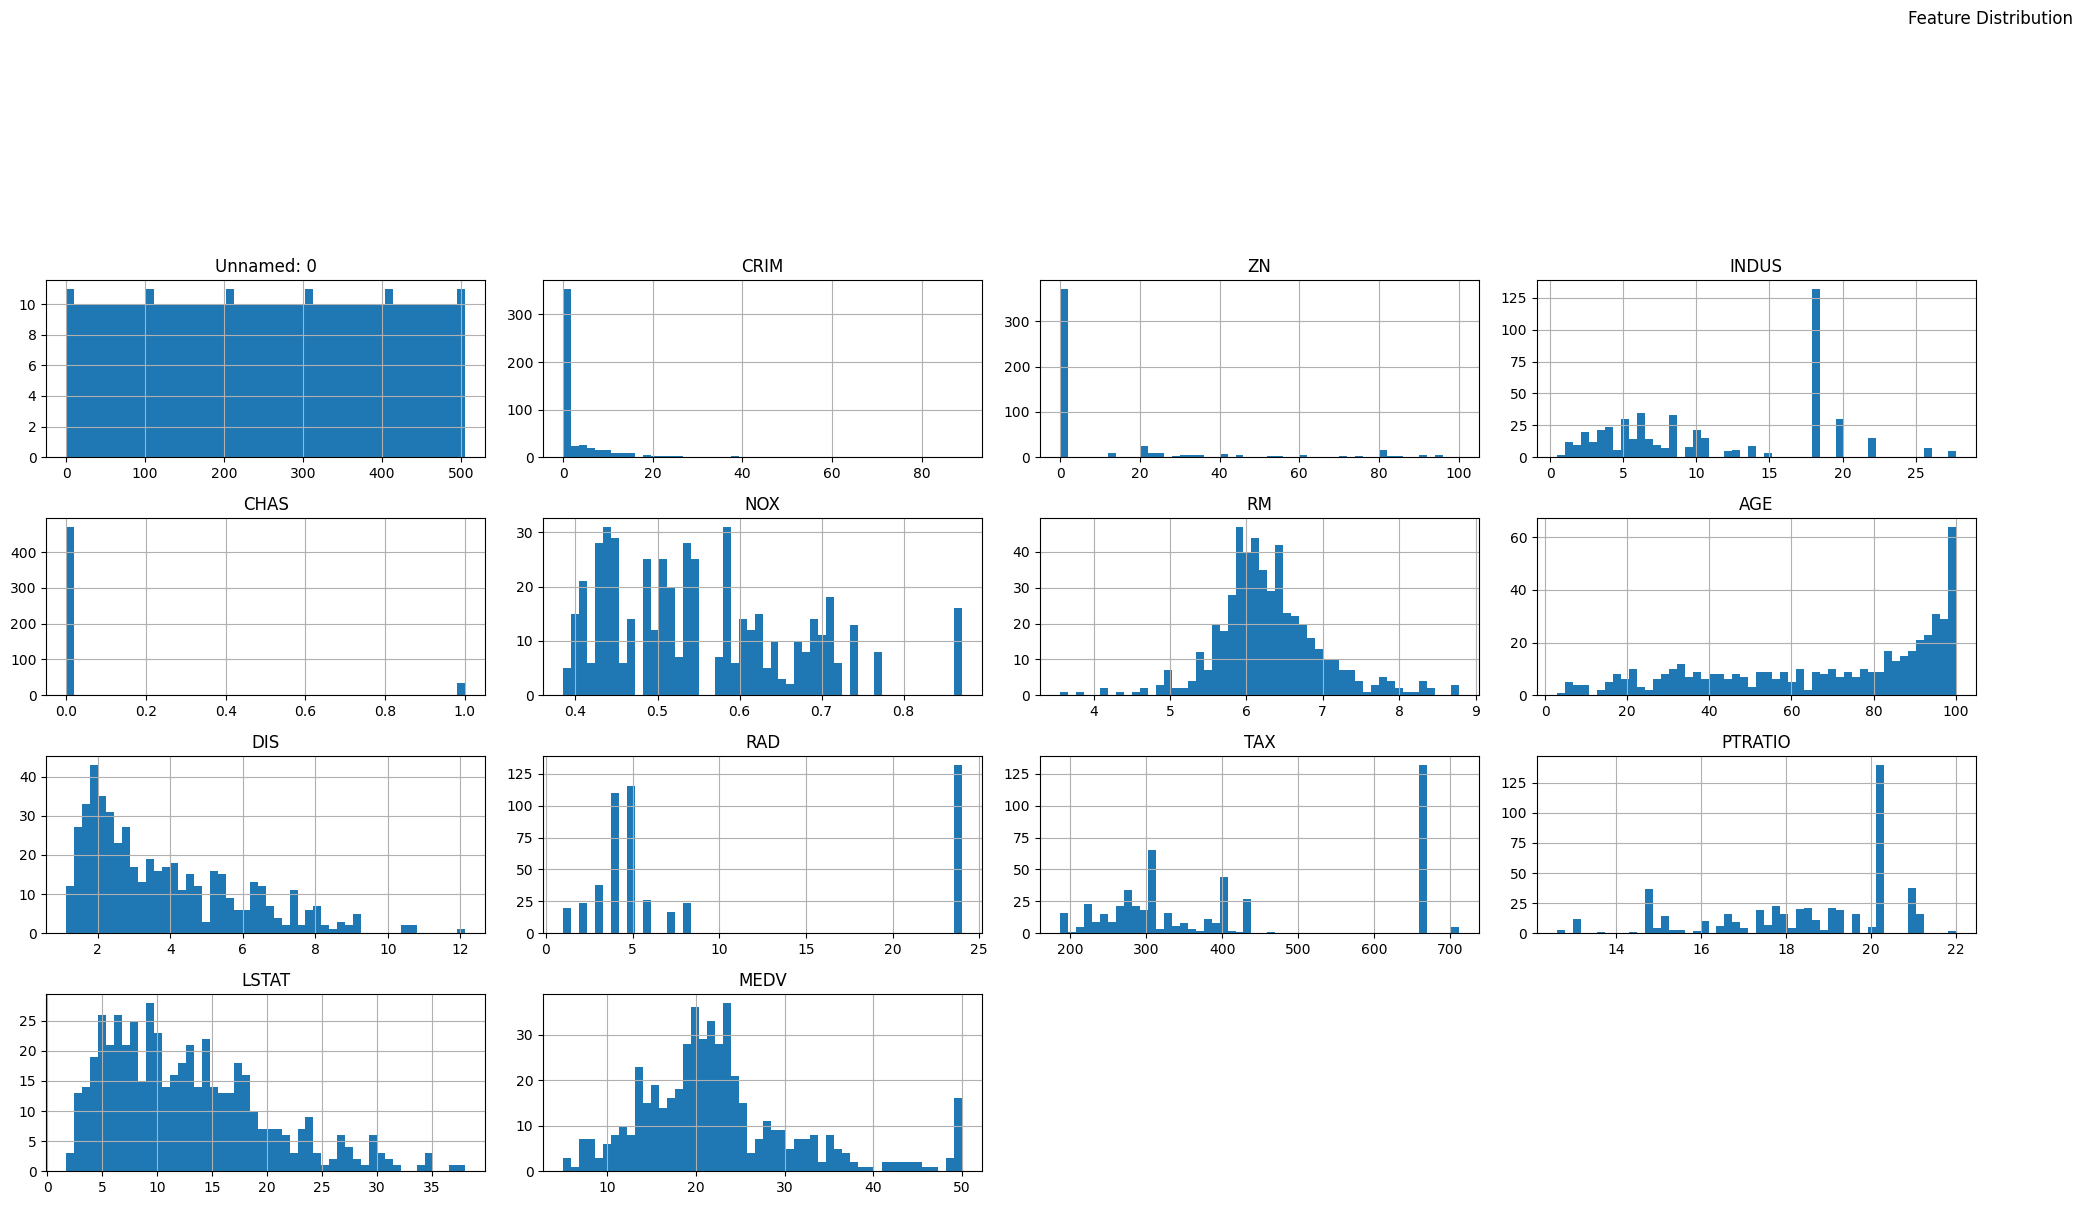

In [12]:
# DATA VISUALIZATIONS

boston_df.hist(bins=50, figsize=(20,10))
pyplot.suptitle('Feature Distribution', x=1, y=1.2, ha='center', fontsize='large')
pyplot.tight_layout()
pyplot.show()

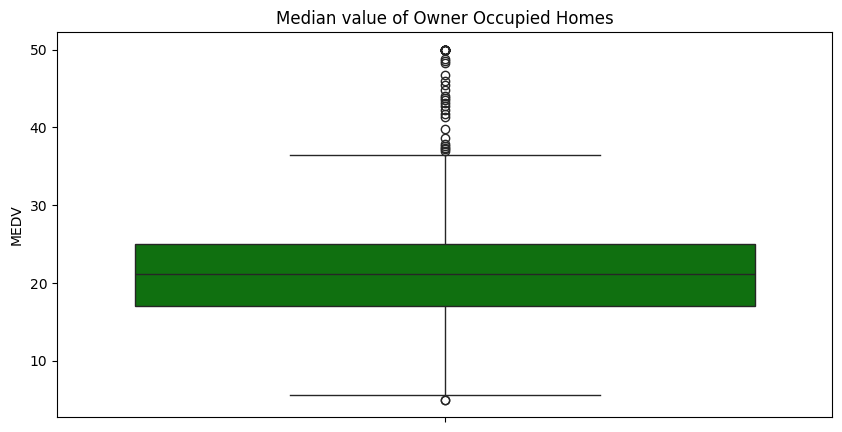

In [33]:
# Task-2
# Boxplot for Median value for owner_occupied Homes

pyplot.figure(figsize=(10,5))
columns = boston_df['MEDV']
sns.boxplot(columns,patch_artist=True,color='green')
pyplot.title("Median value of Owner Occupied Homes")
pyplot.show()

##Explanation : Outliers after 3rd quartile

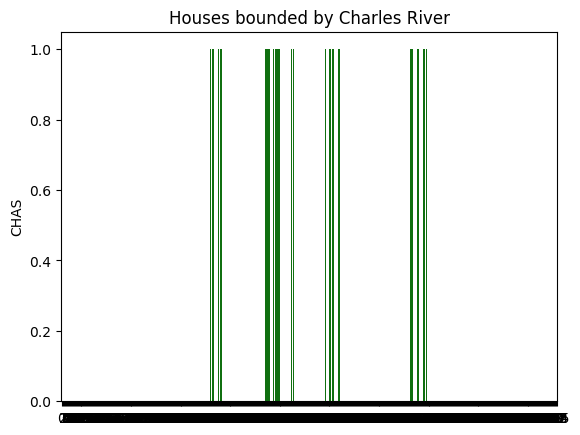

In [18]:
#Bar Plot for Charles river variable (CHAS)

columns = boston_df['CHAS']
sns.barplot(columns, color='green')
pyplot.title('Houses bounded by Charles River')
pyplot.show()

#Explanation : Majortity of the tracts don't bound charles river

In [20]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, 
#between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'

boston_df


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


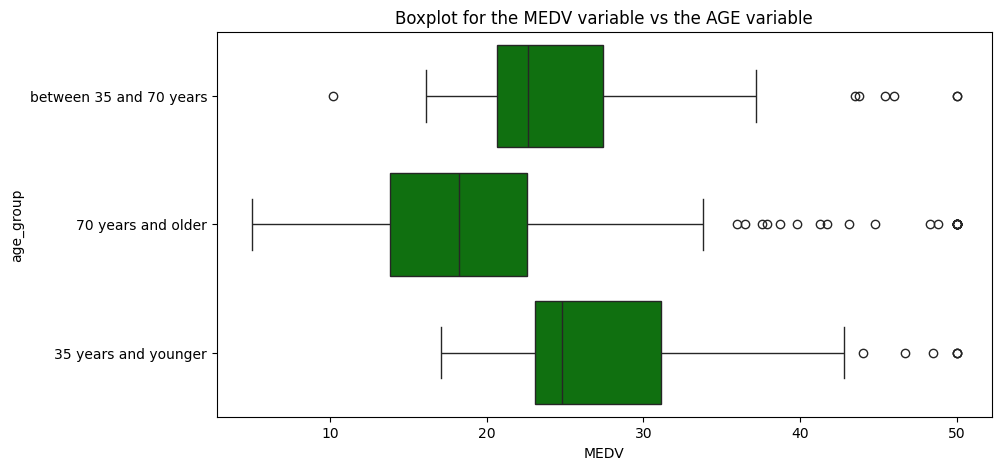

In [31]:
pyplot.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV, y=boston_df.age_group, data=boston_df,patch_artist=True, color='green')
pyplot.title("Boxplot for the MEDV variable vs the AGE variable")
pyplot.show()

#Explanation : 35 years or youngers pays the highest median prices for house 
#while the 70 years and older are moving to cheap areas

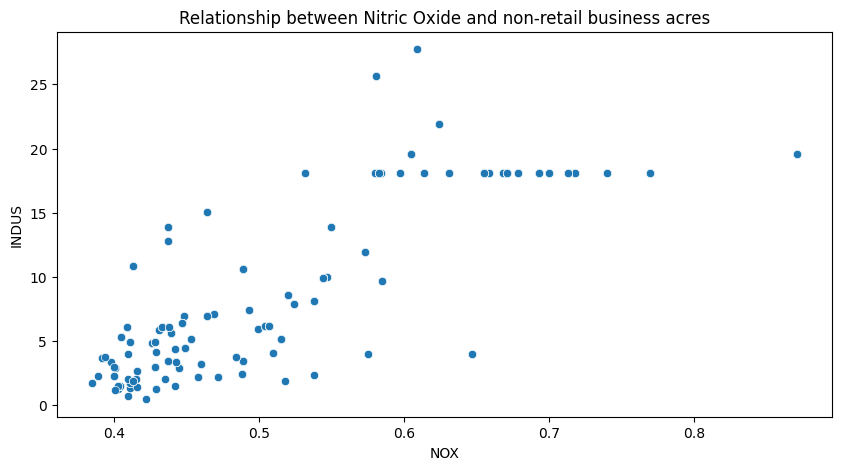

In [34]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations 
#and the proportion of non-retail business acres per town. What can you say about the relationship?

pyplot.figure(figsize=(10,5))
sns.scatterplot(x=boston_df.NOX, y=boston_df.INDUS, data=boston_df)
pyplot.title("Relationship between Nitric Oxide and non-retail business acres")
pyplot.show()


# Explanation : There is a linear relationship between NOX & INDUS till 0.6. After that till 0.8 it gets saturated.

<ipython-input-35-e2913021e4aa>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=boston_df.PTRATIO,bins=10, kde=False)


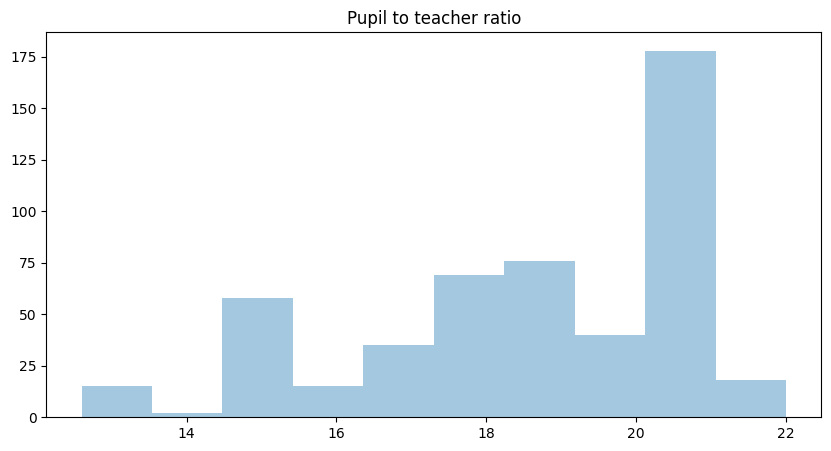

In [35]:
# Create a histogram for the pupil to teacher ratio variable

pyplot.figure(figsize=(10,5))
sns.distplot(x=boston_df.PTRATIO,bins=10, kde=False)
pyplot.title("Pupil to teacher ratio")
pyplot.show()

# Explanation : Pupil to Teacher ratio is highest between 20-22


In [40]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? 
#(T-test for independent samples)

# Null Hypothesis : HO --> There is no statistical difference between median values of the houses bounded by the charles river or those not bounded by it
# Alt Hypothesis : HA --> There is a statistical difference between median values of the houses bounded by the charles river or those not bounded by it

# alpha = 0.05

scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],
                      boston_df[boston_df['CHAS']==1]['MEDV'],
                      equal_var=True)


# p-value = 0.000073906231705199

## Explanation : Here p-value is less than 0.05, so we can conclude that there is a statistical difference between 
##               the median value of the houses that are bounded by the Charles river and those not bounded by the charles river.



TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [47]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 
#(AGE)? (ANOVA)

#Null Hypothesis : H0 --> There is no difference between the means of 3 different age groups
# Alt Hypothesis : H1 --> There is a difference in atleast one of the means for different age groups

# alpha = 0.05

#boston_df


younger = boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"]
midlife = boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"]
elder =   boston_df[boston_df["age_group"] == '70 years and older']["MEDV"]

f_stat,p_value = scipy.stats.f_oneway(younger,midlife,elder)
print("F-Statistic:{0}, P-value:{1}".format(f_stat,p_value))

# p-value = 0.0000000000000017105011022703

## Explanation : Here p-value is less than 0.05, so we can conclude that there is a statistical different in median value of 
##               houses for atleast one of the age groups.



F-Statistic:36.40764999196599, P-value:1.7105011022702984e-15


In [49]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 
#(Pearson Correlation)

#Null Hypothesis : H0 --> No relationship exists between NOX & INDUS
#Alt Hypothesis : H1 --> Relation exists between NOX & INDUS

pearson_coeff, p_value = scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])
print("Pearson Coefficient:{0}, P-value:{1}".format(pearson_coeff,p_value))


## Explanation : Since p-value is less than 0.05, we can conclude that there is a relationship exists between Nitric Oxide concenterations 
##               and propertion of non-retail business acres per town.



Pearson Coefficient:0.7636514469209192, P-value:7.913361061210442e-98


In [51]:
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? 
# (Regression analysis)


#Null Hypothesis : H0 --> No impact of additional five Boston employment centres on median value of owner occupied homes
#Alt Hypothesis : H1 --> There is impact of additional five Boston employment centres on median value of owner occupied homes

X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict()

model.summary()

# Pearson coeff = sqrt(0.062) ---> 0.248998

## Explanation : Pearson coeff is 0.25, which implies that there is a weak correlation between median value of owner occupied homes versus 
##               additional five Boston employment centres


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.21e-08
Time:                        23:08:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""